# مشروع تحليل بيانات تصاريح تطبيق نُسُك لعام ١٤٤٤هـ 

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Read csv file
df = pd.read_csv('number-of-permits-from-the-nsk.csv')

# تقييم البيانات

In [35]:
# Display the first five rows of the DataFrame using .head
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
0,10815,روضة رجال,ذكر,1444/1/3
1,10591,روضة نساء,أنثى,1444/2/4
2,73039,عمرة,ذكر,1444/1/7
3,8092,روضة رجال,ذكر,1444/1/16
4,14544,روضة نساء,أنثى,1444/3/12


In [36]:
# Display the last five rows of the DataFrame using .tail
df.tail()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
1714,1,روضة نساء,ذكر,1444/10/19
1715,1,روضة رجال,أنثى,1444/5/23
1716,1,روضة رجال,أنثى,1444/6/8
1717,1,روضة رجال,أنثى,1444/10/29
1718,1,روضة رجال,أنثى,1444/9/5


In [37]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   اليوم                1719 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.8+ KB


In [38]:
# Display the entry counts using .value_counts
df.value_counts("نوع التصريح")

نوع التصريح
عمرة         708
روضة نساء    576
روضة رجال    435
dtype: int64

In [39]:
# Display the entry counts using .value_counts
df.value_counts("الجنس")

الجنس
ذكر     930
أنثى    789
dtype: int64

In [40]:
# Count of missing values in each column
df.isnull().sum()

عدد التصاريح من نسك    0
نوع التصريح            0
الجنس                  0
اليوم                  0
dtype: int64

In [41]:
# Count of duplicate rows 
df.duplicated().sum()

0

### :ملخص التقييم 

هناك ٤ أعمدة و ١٧١٩ صف 
 
 :الأعمدة هي
 
 `عدد التصاريح من نسك` : عدد التصاريح التي تم إصدارها من تطبيق نُسك لعام ١٤٤٤هـ

 `نوع التصريح` : تصريح عمرة، تصريح زيارة للروضة للرجال، تصريح زيارة للروضة للنساء

 `الجنس` : ذكر و أنثى

 `اليوم` : تاريخ إصدار التصريح

من خلال التقييم نلاحظ أنَّ جودة البيانات عالية لا يوجد بيانات مفقودة أو خالية، عناوين الأعمدة واضحة ووصفية، نوع البيانات صحيح لكل عمود ماعدا عمود اليوم، لا يوجد تكرارات للبيانات.

سأحتاج فقط لفصل اليوم و الشهر من عمود `اليوم` لاستخدامه في تحليلي، سأقوم بحذف السنة؛ لأنها ستكون لجميع البيانات ١٤٤٤هـ. 

# تنظيف البيانات

كما لاحظنا في القسم السابق أن البيانات نظيفة لا نحتاج إلا لفصل عمود `اليوم` إلى عمود للشهر وعمود لليوم لاحتياجي له في تحليلي وحذف عمود `اليوم` بعد الفصل

In [42]:
# Extract month and day from 'اليوم' column
df["الشهر"] = df["اليوم"].apply(lambda x : x.split("/")[1])
df["اليوم_"] = df["اليوم"].apply(lambda x : x.split("/")[2])

# Check for Extracting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1444/1/3,1,3
1,10591,روضة نساء,أنثى,1444/2/4,2,4
2,73039,عمرة,ذكر,1444/1/7,1,7
3,8092,روضة رجال,ذكر,1444/1/16,1,16
4,14544,روضة نساء,أنثى,1444/3/12,3,12


In [43]:
# Delete 'اليوم' column
df.drop(["اليوم"], axis = 1, inplace = True)

# Check for Deleting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1,3
1,10591,روضة نساء,أنثى,2,4
2,73039,عمرة,ذكر,1,7
3,8092,روضة رجال,ذكر,1,16
4,14544,روضة نساء,أنثى,3,12


In [47]:
# Check for data type for the new two columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   الشهر                1719 non-null   object
 4   اليوم_               1719 non-null   object
dtypes: int64(1), object(4)
memory usage: 67.3+ KB


احتاج إلى تحويل نوع البيانات لعمود الشهر واليوم_  من نص إلى رقم صحيح

In [49]:
# Convert 'الشهر' and 'اليوم_' columns to int64
df['الشهر'] = df['الشهر'].astype(int)
df['اليوم_'] = df['اليوم_'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   الشهر                1719 non-null   int64 
 4   اليوم_               1719 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 67.3+ KB


### :ملخص التنظيف

تم فصل الشهر واليوم من عمود `اليوم` إلى عمودين منفصلين، ومن ثم حذف عمود `اليوم`، بعد ذك تم تحويل نوع البيانات للعمودين الشهر واليوم إلى نوع رقم صحيح  

# التحليل الإستكشافي للبيانات

In [45]:
df.describe()

,عدد التصاريح من نسك
count,1719.000000
mean,18457.862711
std,22200.683072
min,1.000000
25%,8068.500000
50%,15467.000000
75%,21203.000000
max,160304.000000


لعام ١٤٤٤هـ/ 

أقل عدد تصاريح من تطبيق نُسك كان تصريح واحد فقط 

أعلى عدد تصاريح من تطبيق نُسك كان 160,304 تصريح

متوسط عدد التصاريح لهذا العام كان 18,457 تصريح

In [46]:
# retrieving rows by loc method
max_permits = df.loc[160304]

# display
max_permits

KeyError: 160304

كان أعلى عدد تصاريح من تطبيق نُسك هي عدد تصاريح العمرة التي تم إصدارها في يوم ٢٧ رمضان حيث كان عددها ما يقارب ١٦٠ ألف تصريح عمرة للرجال  

In [ ]:
b = df.loc[df["اليوم"] == "1444/9/27",:]
b

روضة نساء والحنس ذكر! فيه خطأ

اتصاريح العمرة يوم ٢٧/٩ للنساء كانت مايقارب ٧٥ ألف تصريح عمرة

In [ ]:
wrong_info = df.loc[(df["نوع التصريح"] == "روضة نساء") & (df["الجنس"] == "ذكر")]
wrong_info

In [ ]:
wrong_info2 = df.loc[(df["نوع التصريح"] == "روضة رجال") & (df["الجنس"] == "أنثى")]
wrong_info2

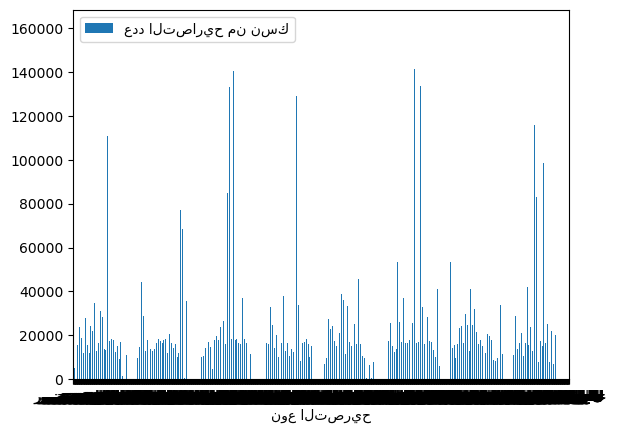

In [44]:
x = df.plot.bar(x='نوع التصريح', y='عدد التصاريح من نسك', rot=0)